In [ ]:
import math, random

class sigmoid_activation:

  def __init__(self):
    pass

  def run(self, x):
    return 1/(1+math.exp(-x))

  def d_run(self, y):
    return y*(1-y)


Text(0.5, 1.0, 'XOR-INSEPERABLE')

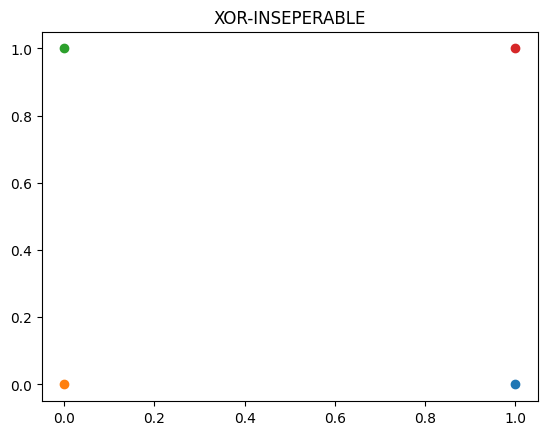

In [ ]:
import matplotlib.pyplot as plt

train_dataset = [
            [(1, 0), [1]],
            [(0, 0), [0]],
            [(0, 1), [1]],
            [(1, 1), [0]]
            ]

for i in train_dataset:
  plt.scatter(i[0][0], i[0][1])

plt.title('XOR-INSEPERABLE')

In [ ]:
class neuron:
  def __init__(self, units, activation='sigmoid'):
    self.bias = 1
    self.__weights = [random.random() for _ in range(units)]
    self.units = units
    self.activation = activation
    self.__output = 0
    self.inputs = []
    self.__error = 0

  def output(self, inputs):

    self.inputs = inputs
    assert len(self.inputs) == self.units, 'Check input units'
    self.__output = [self.__weights[i]*inputs[i] for i in range(self.units)]
    self.__output = sigmoid_activation().run(sum(self.__output)+self.bias)
    return self.__output

  def calculate_error(self, error):
    self.__error = error * sigmoid_activation().d_run(self.__output)

  def update_weights(self, lr=1e-4):
    for i in range(self.units):
      self.weights[i] -= self.error*self.inputs[i]*lr

    self.bias -= self.__error*lr

    self.output(self.inputs)


  @property
  def _output(self):
    return self.__output

  @property
  def error(self):
    return self.__error

  @property
  def weights(self):
    return self.__weights

In [ ]:
class layers:

  def __init__(self, n_inputs, units, activation='sigmoid'):
    self.__neurons = [neuron(units=n_inputs) for i in range(units)]

  def feedforward(self, inputs):
    return [neuron_.output(inputs) for neuron_ in self.__neurons]

  def update_weights(self, lr=1e-4):
    for neuron_ in self.__neurons:
      neuron_.update_weights(lr)

  @property
  def neurons(self):
    return self.__neurons

In [ ]:
class neural_net:
  def __init__(self, activation='sigmoid', lr=1e-4):
    self.activation = activation
    self.lr = lr
    self.__layers = []

  def layer_add(self, n_inputs, units):
    layer = layers(n_inputs, units)
    self.__layers.append(layer)

  def feedforward(self, inputs):
    for i, layer in enumerate(self.__layers):
      inputs = layer.feedforward(inputs)

    return inputs

  def feedbackward(self, required_outputs):

    for i, n_i in enumerate(self.__layers[-1].neurons):
      error = (n_i._output - required_outputs[i])
      n_i.calculate_error(error)

    for i in range(1, len(self.__layers[:-1])):
      this_layer, last_layer = self.__layers[i], self.__layers[i+1]
      for x, n_x in enumerate(this_layer.neurons):
        error_ = 0
        for y, n_y in enumerate(last_layer.neurons):
          error_ += n_y.error * n_y.weights[i]
        n_i.calculate_error(error_)

  def update_weights(self):
    for i in self.__layers:
      i.update_weights(self.lr)

  def single__error(self, required_output, actual_output):
    e = 0
    for i in range(len(required_output)):
      e += math.pow((required_output[i] - actual_output[i]), 2)

    return e

  def __error(self, dataset):
    error__ = 0
    size = len(dataset)
    for inputs, required_outputs, in dataset:
      result = self.feedforward(inputs)
      error__ += self.single__error(required_outputs, result)

    return error__/size

  def train(self, dataset, iterate=100):
    print('####\nTraining\n###')
    for i in range(iterate):
      print('\nIteration #{}'.format(i))

      for index, (input, targets) in enumerate(dataset):
        self.feedforward(input)
        self.feedbackward(targets)
        self.update_weights()

      errors = self.__error(dataset)

      print('\nError {}'.format(errors))

  def evaluate(self, dataset):
    print('\nBeginning###\n')
    for index, (inputs, targets) in enumerate(dataset):
      output = self.feedforward(inputs)

    e = self.__error(dataset)
    print('\nFINISHED EVALUATING \n TOTAL ERROR: {}'.format(e))

In [ ]:
complete_network = neural_net(lr=1e-1)

In [ ]:
complete_network.layer_add(n_inputs=2,units=3)

In [ ]:
complete_network.layer_add(n_inputs=3,units=1)

In [ ]:
complete_network.train(dataset=train_dataset, iterate=100)

####
Training
###

Iteration #0

Error 0.4538752850576888

Iteration #1

Error 0.4528595727703411

Iteration #2

Error 0.4518034763316313

Iteration #3

Error 0.4507048079950498

Iteration #4

Error 0.449561239784988

Iteration #5

Error 0.44837029427949754

Iteration #6

Error 0.4471293349729138

Iteration #7

Error 0.445835556260887

Iteration #8

Error 0.44448597311213345

Iteration #9

Error 0.4430774105189201

Iteration #10

Error 0.4416064928532656

Iteration #11

Error 0.44006963329969717

Iteration #12

Error 0.43846302359002776

Iteration #13

Error 0.436782624333251

Iteration #14

Error 0.4350241563168159

Iteration #15

Error 0.433183093257151

Iteration #16

Error 0.4312546566005146

Iteration #17

Error 0.4292338131234629

Iteration #18

Error 0.4271152762588633

Iteration #19

Error 0.42489351228163597

Iteration #20

Error 0.4225627527307641

Iteration #21

Error 0.4201170147217087

Iteration #22

Error 0.41755013111495676

Iteration #23

Error 0.41485579284707386

Iter

In [ ]:
test_dataset = [
    [(1, 0), [1]],
    [(0, 0), [0]]
]

complete_network.evaluate(test_dataset)


Beginning###


FINISHED EVALUATING 
 TOTAL ERROR: 0.24854603697131286
